In [42]:
import GateLibrary2 as gl
from sympy import Matrix
import sympy as sp
from sympy.physics.quantum import Dagger, TensorProduct
from sympy import simplify,N


Parameter yang digunakan

In [43]:
#Kekuatan noise
NoiseStrength = 0.8

#Nilai gamma
GammaValue = 1/2
GammaValue = simplify(GammaValue)


In [44]:
#Sekarang kita akan melakukan perhitungan untuk output state untuk kasus keduanya depolarizing
gate_p = gl.choose_gate('p',4)
gate_q = gl.choose_gate('p',4)
rho0 = Matrix([[1,0],[0,0]])
rho1 = Matrix([[0,0],[0,1]])
#Bentuk K_{ij}
K = [[0 for i in range(4)] for i in range(4)]
K_dag = [[0 for i in range(4)] for i in range(4)]
for i in range(4):
    for j in range(4):
        pauli_ij = gate_p['matrices'][i]*gate_q['matrices'][j]
        pauli_ji = gate_p['matrices'][j]*gate_q['matrices'][i]
        K[i][j] = (TensorProduct(rho0,pauli_ij) + TensorProduct(rho1,pauli_ji))
        K_dag[i][j] = Dagger(TensorProduct(rho0,pauli_ij) + TensorProduct(rho1,pauli_ji))


In [45]:
#Sekarang kita akan melakukan pendefinisian awal

#Definisikan control qubit
gamma = sp.Symbol('gamma',real = True)
control = Matrix([[gamma,sp.sqrt(gamma*(1-gamma))],[sp.sqrt(gamma*(1-gamma)),1-gamma]])

#Definisikan transmitted qubit
a = sp.Symbol('a',real = True)
b = sp.Symbol('b',real = True)
c = sp.Symbol('c',real = True)
pauli0 = sp.Matrix([[1,0],[0,1]])
pauli1 = sp.Matrix([[0,1],[1,0]])
pauli2 = sp.Matrix([[0,-sp.I],[sp.I,0]])
pauli3 = sp.Matrix([[1,0],[0,-1]])
transmitted = sp.Rational(1/2)*pauli0 + (a/2)*pauli1 + (b/2)*pauli2 + (c/2)*pauli3

total_qubit = TensorProduct(control,transmitted)

In [46]:
#Cari output state
output_state = Matrix([[0 for i in range(4)] for j in range(4)])

for i in range(4):
    for j in range(4):
        #Bentuk ini bisa digunakan karena matriks pauli bersifat Hermitian dan self-adjoint(?)
        output_state += K[i][j]*total_qubit*K_dag[i][j]

output_state

Matrix([
[                                                                                         gamma*p**4*(1/2 - c/2)/64 + 5*gamma*p**4*(c/2 + 1/2)/256 + gamma*p**2*(1/2 - c/2)*(1 - 3*p/4)**2/4 + gamma*p**2*(1 - 3*p/4)**2*(c/2 + 1/2)/8 + gamma*(1 - 3*p/4)**4*(c/2 + 1/2),                                                                                                                                                           gamma*p**4*(a/2 - I*b/2)/256 - gamma*p**2*(1 - 3*p/4)**2*(a/2 - I*b/2)/8 + gamma*(1 - 3*p/4)**4*(a/2 - I*b/2), -p**4*sqrt(gamma*(1 - gamma))*(1/2 - c/2)/64 + p**4*sqrt(gamma*(1 - gamma))*(c/2 + 1/2)/256 + p**2*sqrt(gamma*(1 - gamma))*(1/2 - c/2)*(1 - 3*p/4)**2/4 + p**2*sqrt(gamma*(1 - gamma))*(1 - 3*p/4)**2*(c/2 + 1/2)/8 + sqrt(gamma*(1 - gamma))*(1 - 3*p/4)**4*(c/2 + 1/2),                                                                                                   5*p**4*sqrt(gamma*(1 - gamma))*(a/2 - I*b/2)/256 - p**2*sqrt(gamma*(1 - gamma))*(1 - 3*p/4)**2*

Substitusi nilai dari p dan q

In [47]:
p = sp.Symbol('p',real = True)
#q = sp.Symbol('q',real = True)
output_subs = output_state.subs(p,NoiseStrength)
output_subs2 = output_subs
#output_subs2 = output_subs.subs(q,1/2)
#output_state
output_subs2

Matrix([
[                                   0.032*gamma*(1/2 - c/2) + 0.0464*gamma*(c/2 + 1/2),                                                            0.0144*gamma*(a/2 - I*b/2), 0.0192*sqrt(gamma*(1 - gamma))*(1/2 - c/2) + 0.04*sqrt(gamma*(1 - gamma))*(c/2 + 1/2),                                          0.0208*sqrt(gamma*(1 - gamma))*(a/2 - I*b/2)],
[                                                           0.0144*gamma*(a/2 + I*b/2),                                    0.0464*gamma*(1/2 - c/2) + 0.032*gamma*(c/2 + 1/2),                                          0.0208*sqrt(gamma*(1 - gamma))*(a/2 + I*b/2), 0.04*sqrt(gamma*(1 - gamma))*(1/2 - c/2) + 0.0192*sqrt(gamma*(1 - gamma))*(c/2 + 1/2)],
[0.0192*sqrt(gamma*(1 - gamma))*(1/2 - c/2) + 0.04*sqrt(gamma*(1 - gamma))*(c/2 + 1/2),                                          0.0208*sqrt(gamma*(1 - gamma))*(a/2 - I*b/2),                        0.032*(1/2 - c/2)*(1 - gamma) + 0.0464*(1 - gamma)*(c/2 + 1/2),                              

Di bagian ini kita ingin mencari nilai dari $\tilde{\rho_c}$

In [48]:
rho_c_tilde = Matrix([[output_subs2[0,0]+output_subs2[1,1],output_subs2[0,2]+output_subs2[1,3]],[output_subs2[2,0]+output_subs2[3,1],output_subs2[2,2]+output_subs2[3,3]]])

rho_c_tilde

Matrix([
[                                    0.0784*gamma*(1/2 - c/2) + 0.0784*gamma*(c/2 + 1/2), 0.0592*sqrt(gamma*(1 - gamma))*(1/2 - c/2) + 0.0592*sqrt(gamma*(1 - gamma))*(c/2 + 1/2)],
[0.0592*sqrt(gamma*(1 - gamma))*(1/2 - c/2) + 0.0592*sqrt(gamma*(1 - gamma))*(c/2 + 1/2),                         0.0784*(1/2 - c/2)*(1 - gamma) + 0.0784*(1 - gamma)*(c/2 + 1/2)]])

In [49]:
Eigen_value = output_subs2.eigenvals()

In [50]:
EigValC = rho_c_tilde.eigenvals()
EigValC

{0.0392 - 0.0513996108934688*sqrt(1.0*gamma**2 - 1.0*gamma + 0.581637596899224): 1,
 0.0513996108934688*sqrt(1.0*gamma**2 - 1.0*gamma + 0.581637596899224) + 0.0392: 1}

In [51]:
keys = [k for k in Eigen_value]
kunci = 0
for i in keys:
    if Eigen_value[i]>1:
        kunci = i
keys.append(kunci)

In [52]:
keys_c = [k for k in EigValC]
kunci = 0
for i in keys_c:
    if EigValC[i]>1:
        kunci = i
keys_c.append(kunci)

In [53]:
keys[0]

Piecewise((-sqrt(6)*sqrt(-0.00011264*a**2*gamma**2 + 0.00011264*a**2*gamma + 5.18399999999999e-5*a**2 - 0.00011264*b**2*gamma**2 + 0.00011264*b**2*gamma + 5.18399999999999e-5*b**2 - 0.00011264*c**2*gamma**2 + 0.00011264*c**2*gamma + 5.18399999999998e-5*c**2 + 0.00132096*gamma**2 - 0.00132096*gamma - 3**(2/3)*((0.00011264*a**2*gamma**2 - 0.00011264*a**2*gamma - 5.18399999999999e-5*a**2 + 0.00011264*b**2*gamma**2 - 0.00011264*b**2*gamma - 5.18399999999999e-5*b**2 + 0.00011264*c**2*gamma**2 - 0.00011264*c**2*gamma - 5.18399999999998e-5*c**2 - 0.00132096*gamma**2 + 0.00132096*gamma - 0.000768319999999999)*(3.17194239999999e-9*a**4*gamma**4 - 6.34388479999999e-9*a**4*gamma**3 + 3.17194239999999e-9*a**4*gamma**2 - 8.27180612553028e-25*a**4*gamma + 6.34388479999999e-9*a**2*b**2*gamma**4 - 1.26877696e-8*a**2*b**2*gamma**3 + 6.34388479999999e-9*a**2*b**2*gamma**2 - 1.65436122510606e-24*a**2*b**2*gamma + 6.3438848e-9*a**2*c**2*gamma**4 - 1.26877696e-8*a**2*c**2*gamma**3 + 6.34388479999999e-9*a**

In [54]:
keys[1]

Piecewise((-sqrt(6)*sqrt(-0.00011264*a**2*gamma**2 + 0.00011264*a**2*gamma + 5.18399999999999e-5*a**2 - 0.00011264*b**2*gamma**2 + 0.00011264*b**2*gamma + 5.18399999999999e-5*b**2 - 0.00011264*c**2*gamma**2 + 0.00011264*c**2*gamma + 5.18399999999998e-5*c**2 + 0.00132096*gamma**2 - 0.00132096*gamma - 3**(2/3)*((0.00011264*a**2*gamma**2 - 0.00011264*a**2*gamma - 5.18399999999999e-5*a**2 + 0.00011264*b**2*gamma**2 - 0.00011264*b**2*gamma - 5.18399999999999e-5*b**2 + 0.00011264*c**2*gamma**2 - 0.00011264*c**2*gamma - 5.18399999999998e-5*c**2 - 0.00132096*gamma**2 + 0.00132096*gamma - 0.000768319999999999)*(3.17194239999999e-9*a**4*gamma**4 - 6.34388479999999e-9*a**4*gamma**3 + 3.17194239999999e-9*a**4*gamma**2 - 8.27180612553028e-25*a**4*gamma + 6.34388479999999e-9*a**2*b**2*gamma**4 - 1.26877696e-8*a**2*b**2*gamma**3 + 6.34388479999999e-9*a**2*b**2*gamma**2 - 1.65436122510606e-24*a**2*b**2*gamma + 6.3438848e-9*a**2*c**2*gamma**4 - 1.26877696e-8*a**2*c**2*gamma**3 + 6.34388479999999e-9*a**

In [55]:
keys[2]

Piecewise((sqrt(6)*sqrt(-0.00011264*a**2*gamma**2 + 0.00011264*a**2*gamma + 5.18399999999999e-5*a**2 - 0.00011264*b**2*gamma**2 + 0.00011264*b**2*gamma + 5.18399999999999e-5*b**2 - 0.00011264*c**2*gamma**2 + 0.00011264*c**2*gamma + 5.18399999999998e-5*c**2 + 0.00132096*gamma**2 - 0.00132096*gamma - 3**(2/3)*((0.00011264*a**2*gamma**2 - 0.00011264*a**2*gamma - 5.18399999999999e-5*a**2 + 0.00011264*b**2*gamma**2 - 0.00011264*b**2*gamma - 5.18399999999999e-5*b**2 + 0.00011264*c**2*gamma**2 - 0.00011264*c**2*gamma - 5.18399999999998e-5*c**2 - 0.00132096*gamma**2 + 0.00132096*gamma - 0.000768319999999999)*(3.17194239999999e-9*a**4*gamma**4 - 6.34388479999999e-9*a**4*gamma**3 + 3.17194239999999e-9*a**4*gamma**2 - 8.27180612553028e-25*a**4*gamma + 6.34388479999999e-9*a**2*b**2*gamma**4 - 1.26877696e-8*a**2*b**2*gamma**3 + 6.34388479999999e-9*a**2*b**2*gamma**2 - 1.65436122510606e-24*a**2*b**2*gamma + 6.3438848e-9*a**2*c**2*gamma**4 - 1.26877696e-8*a**2*c**2*gamma**3 + 6.34388479999999e-9*a**2

In [56]:
keys[3]

Piecewise((sqrt(6)*sqrt(-0.00011264*a**2*gamma**2 + 0.00011264*a**2*gamma + 5.18399999999999e-5*a**2 - 0.00011264*b**2*gamma**2 + 0.00011264*b**2*gamma + 5.18399999999999e-5*b**2 - 0.00011264*c**2*gamma**2 + 0.00011264*c**2*gamma + 5.18399999999998e-5*c**2 + 0.00132096*gamma**2 - 0.00132096*gamma - 3**(2/3)*((0.00011264*a**2*gamma**2 - 0.00011264*a**2*gamma - 5.18399999999999e-5*a**2 + 0.00011264*b**2*gamma**2 - 0.00011264*b**2*gamma - 5.18399999999999e-5*b**2 + 0.00011264*c**2*gamma**2 - 0.00011264*c**2*gamma - 5.18399999999998e-5*c**2 - 0.00132096*gamma**2 + 0.00132096*gamma - 0.000768319999999999)*(3.17194239999999e-9*a**4*gamma**4 - 6.34388479999999e-9*a**4*gamma**3 + 3.17194239999999e-9*a**4*gamma**2 - 8.27180612553028e-25*a**4*gamma + 6.34388479999999e-9*a**2*b**2*gamma**4 - 1.26877696e-8*a**2*b**2*gamma**3 + 6.34388479999999e-9*a**2*b**2*gamma**2 - 1.65436122510606e-24*a**2*b**2*gamma + 6.3438848e-9*a**2*c**2*gamma**4 - 1.26877696e-8*a**2*c**2*gamma**3 + 6.34388479999999e-9*a**2

In [57]:
for i in range(4):
    keys[i] = keys[i].subs(a,0)
    keys[i] = keys[i].subs(b,0)
    keys[i] = keys[i].subs(c,1)
    keys[i] = keys[i].subs(gamma,GammaValue)

In [58]:
for i in range(2):
    keys_c[i] = keys_c[i].subs(a,0)
    keys_c[i] = keys_c[i].subs(b,0)
    keys_c[i] = keys_c[i].subs(c,1)
    keys_c[i] = keys_c[i].subs(gamma,GammaValue)

Dari bagian ini, kita dapat menghitung von Neumann entropynya sebagai berikut

$H = -\sum_i\lambda_i \ln \lambda_i$

In [59]:
H_output = 0
for i in keys:
    if i == 0:
        H_output = H_output + 0
    else:
        H_output = H_output + i*sp.log(i)


N(H_output)

-0.280270950549649 + 3.14773550505079e-19*I

In [60]:
H_c = 0
for i in keys_c:
    if i == 0:
        H_c = H_c + 0
    else:
        H_c = H_c + i*sp.log(i)


N(H_c)

-0.228748270475027

Sekarang kita akan menghitung nilai dari Holevo Capacitynya melalui ekspresi berikut
$\chi(\mathfrak{s}[\mathcal{N}_p,\mathcal{N}_q]) = 1 + H(\tilde{\rho}_c) - H^{min}(\mathfrak{s}[\mathcal{N}_p,\mathcal{N}_q])$

In [61]:
Holevo_cap = 1 + N(H_c) - N(H_output)
Holevo_cap

1.05152268007462 - 3.14773550505079e-19*I

In [62]:
strength_depo = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
capacity_depo = [1.0,1.01,1.04,]

In [63]:
strength_bfpf = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
capacity_bfpf = [1.0,1.03,1.08,1.12,1.15,1.17,1.16,1.14,1.10,1.04,1.0]

Text(0.5, 1.0, 'Bitflip & Phaseflip')

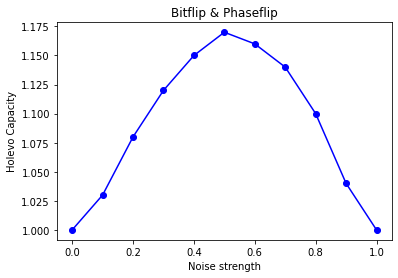

In [64]:
import matplotlib.pyplot as plt

plt.plot(strength_bfpf,capacity_bfpf,'bo-')
plt.xlabel('Noise strength')
plt.ylabel('Holevo Capacity')
plt.title('Bitflip & Phaseflip')
